# Decision Tree, Random Forest & AdaBoost

In [1]:
import pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load data

In [2]:
data = pd.read_csv("abalone.csv")
#data

In [3]:
Sex_2 = []

for i in range(len(data['Sex'])):
    a = 3
    if data['Sex'][i] == "M":
        a = 1
        Sex_2.append(a)
    elif data['Sex'][i] == "F":
        a = 2
        Sex_2.append(a)
    else:
        a2 = 3
        Sex_2.append(a)
#Sex_2


In [4]:
Sex_a = []

for k in range (len(Sex_2)):
    Sex_a.append([Sex_2[k]])
    
Sex_a = pd.DataFrame(Sex_a,columns=['Sex_1'])

data2 = data.join(Sex_a)
#data2

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2[['Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']], data2[['Sex_1']], train_size=0.75)

#print(len(X_test))
#print(len(Y_test))

In [6]:
scaleX = StandardScaler()
#scaleY = StandardScaler()

scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

#scaleY.fit(Y_train)
#Y_train=scaleY.transform(Y_train)
#Y_test=scaleY.transform(Y_test)

# Decision Tree

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [8]:
res = clf.predict(X_test)
#print(len(res))
pred_1 = clf.predict_proba(X_test)
#print(pred)
#type(pred)

In [9]:
y_predict = []

for i in range(len(X_test)):
    a = 0
    if pred_1[i][0] == 1:
        a = 1
        y_predict.append(a)
    elif pred_1[i][1] == 1:
        a = 2
        y_predict.append(a)
    else:
        a = 3
        y_predict.append(a)
        
#print y_predict

#pred = []
#for i in range(len(res)):
#    a=0
#    if (res[i]<1.5):
#        a = 1
#        pred.append(a)
#    elif (res[i] >= 1.5 and res[i] < 2.5):
#        a = 2
#        pred.append(a)
#    else:
#        a = 3
#        pred.append(a)

#print(len(y_predict))
#print(len(Y_test))

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.iloc[:,0],y_predict)
#np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
round(accuracy_score(Y_test, y_predict),2)

Confusion matrix
[[179 166  72]
 [147 117  42]
 [ 56  43 223]]


0.5

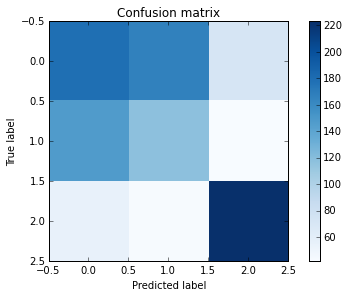

In [11]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=10)
Y_train = np.ravel(Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
y_predict = rf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.iloc[:,0],y_predict)
#np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
round(accuracy_score(Y_test, y_predict),2)

Confusion matrix
[[211 136  70]
 [156 117  33]
 [ 41  41 240]]


0.54

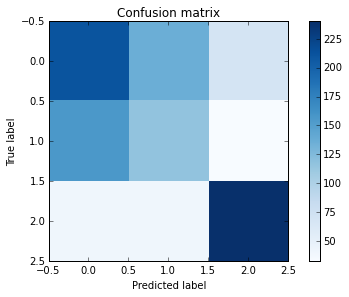

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm)

# Adaboost con árbol de decisión

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
bdt_real = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),n_estimators=600,learning_rate=1)

bdt_discrete = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2),n_estimators=600,learning_rate=1.5,algorithm="SAMME")

bdt_real.fit(X_train, Y_train)
bdt_discrete.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          learning_rate=1.5, n_estimators=600, random_state=None)

In [20]:
y_predict_real = bdt_real.predict(X_test)

y_predict_discrete = bdt_discrete.predict(X_test)

#print(y_predict_real)
#print(y_predict_discrete)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.iloc[:,0],y_predict_real)
#np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
print(accuracy_score(Y_test, y_predict_real))

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test.iloc[:,0],y_predict_discrete)
#np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm2)
print(accuracy_score(Y_test, y_predict_discrete))

Confusion matrix
[[186 156  75]
 [145 122  39]
 [ 55  34 233]]
0.517703349282
Confusion matrix
[[195 147  75]
 [138 134  34]
 [ 45  23 254]]
0.557894736842


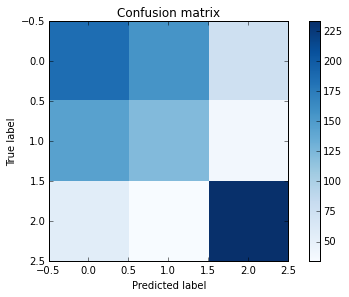

In [22]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm)


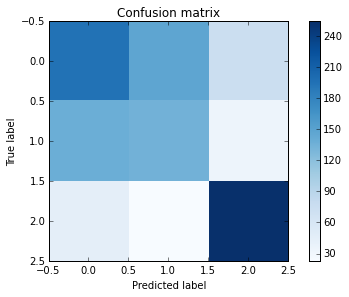

In [23]:
plot_confusion_matrix(cm2)